In [1]:
from astropy.io import fits
from astropy.modeling import models, fitting
from matplotlib import pyplot as plt
import multiprocessing as mp
import numpy as np

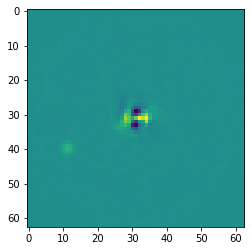

In [79]:
datafilepath = "./out/data_mean_00040_00080.fits"
outfilepath = "./out/signal_plot.png"

with fits.open(datafilepath) as datahdu:
    data = np.array(datahdu[1].data)

plt.imshow(data)

In [80]:
xdim = 63
ydim = 63
yind, xind = np.mgrid[0:xdim, 0:ydim]
subdata = data[35:60, 0:25]
# plt.imshow(subdata)

In [81]:
init_amplitude = np.max(subdata)
init_x_mean = 10
init_y_mean = 40
init_cov_matrix = 5 * np.eye(2)
init_gaus = models.Gaussian2D(amplitude=init_amplitude, x_mean=init_x_mean, y_mean=init_y_mean, cov_matrix=init_cov_matrix)
fitter = fitting.LevMarLSQFitter()

In [82]:
gausfit = fitter(init_gaus, xind, yind, data)
params = [gausfit.amplitude.value, gausfit.x_mean.value, gausfit.y_mean.value, gausfit.x_stddev.value, gausfit.y_stddev.value]
print(params)

[7.323405543008093, 11.229815480224222, 39.80077500816061, 1.1765018825591838, 1.2319507499294522]


In [83]:
bkgd_mean = np.mean(data)
bkgd_sdev = np.std(data)
print(bkgd_mean, bkgd_sdev, bkgd_mean + 5 * bkgd_sdev, (params[0] - bkgd_mean) / bkgd_sdev)

0.03067934275577418 1.2651175050461352 6.35626686798645 5.764465491279701


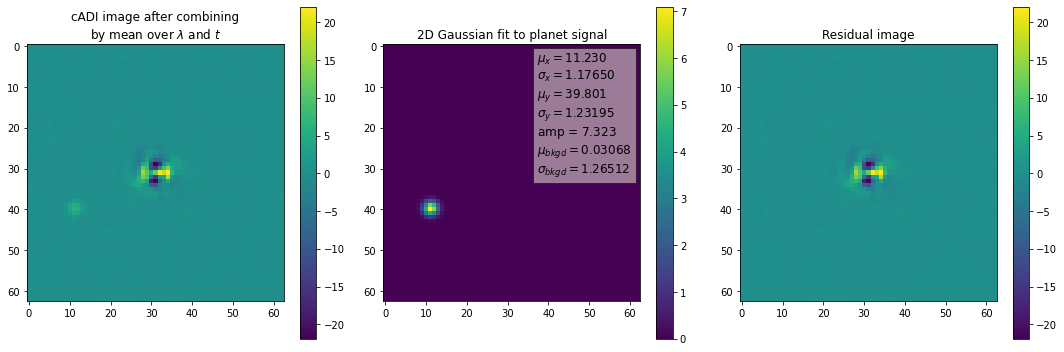

In [85]:

fig = plt.figure(figsize=(15, 5), facecolor='white')
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_title("cADI image after combining\nby mean over $\lambda$ and $t$")
im1 = ax1.imshow(data)
fig.colorbar(im1, ax=ax1)

datastr = r'$\mu_x = ' + '%.03f$\n'%(params[1]) + r'$\sigma_x = ' + '%.05f$\n'%(params[3]) + \
          r'$\mu_y = ' + '%.03f$\n'%(params[2]) + r'$\sigma_y = ' + '%.05f$\n'%(params[4]) + \
          r'amp = ' + '$%.03f$\n'%(params[0]) + r'$\mu_{bkgd} = ' + '%.05f$\n'%(bkgd_mean) + \
          r'$\sigma_{bkgd} = ' + '%.05f$'%(bkgd_sdev)
ax2.text(0.6, 0.5, datastr, fontsize=12, transform=ax2.transAxes,
         bbox=dict(facecolor='#f5f5dc', alpha=0.5))
ax2.set_title("2D Gaussian fit to planet signal")
im2 = ax2.imshow(gausfit(xind, yind))
fig.colorbar(im2, ax=ax2)

ax3.set_title("Residual image")
im3 = ax3.imshow(data - gausfit(xind, yind))
fig.colorbar(im3, ax=ax3)

fig.tight_layout()
fig.savefig(outfilepath)
